In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [2]:
df_annual = pd.read_csv("annual_deaths_by_clinic.csv")


In [3]:
df_annual.head()


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [4]:
df_annual["death_rate"] = df_annual["deaths"] / df_annual["births"]


In [5]:
clinic_1 = df_annual[df_annual["clinic"] == "clinic 1"]
clinic_2 = df_annual[df_annual["clinic"] == "clinic 2"]


In [6]:
rates_1 = clinic_1["death_rate"]
rates_2 = clinic_2["death_rate"]


In [7]:
t_stat, p_value = ttest_ind(rates_1, rates_2)


In [8]:
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 3.57969709633551
P-Value: 0.005014226465470138


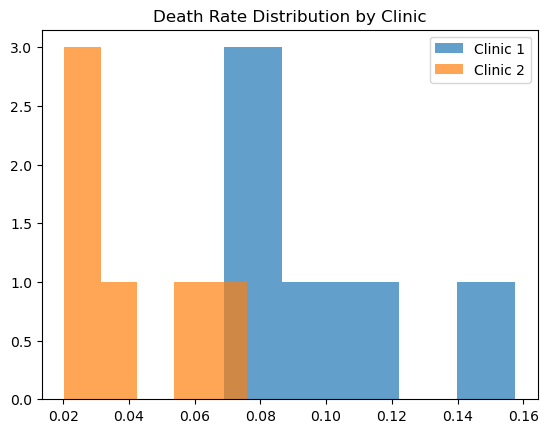

In [9]:
plt.hist(rates_1, bins=5, alpha=0.7, label="Clinic 1")
plt.hist(rates_2, bins=5, alpha=0.7, label="Clinic 2")
plt.legend()
plt.title("Death Rate Distribution by Clinic")
plt.show()


In [10]:
df_monthly = pd.read_csv("monthly_deaths.csv")


In [11]:
df_monthly["date"] = pd.to_datetime(df_monthly["date"])


In [12]:
df_monthly["death_rate"] = df_monthly["deaths"] / df_monthly["births"]


In [13]:
before_wash = df_monthly[df_monthly["date"] < "1847-06-01"]
after_wash  = df_monthly[df_monthly["date"] >= "1847-06-01"]


In [14]:
rates_before = before_wash["death_rate"]
rates_after  = after_wash["death_rate"]


In [15]:
t_stat2, p_value2 = ttest_ind(rates_before, rates_after)


In [16]:
print("T-Statistic:", t_stat2)
print("P-Value:", p_value2)


T-Statistic: 5.511607211341916
P-Value: 2.985436556724523e-07


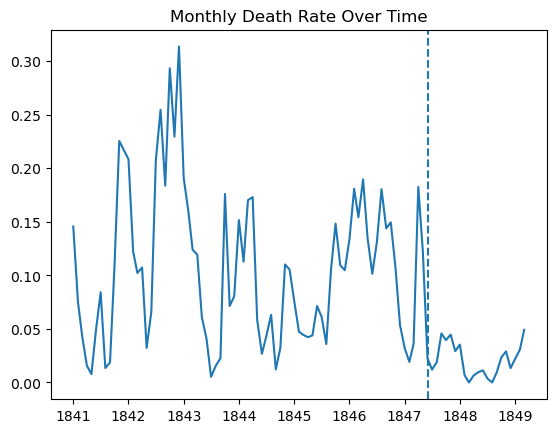

In [17]:
plt.plot(df_monthly["date"], df_monthly["death_rate"])
plt.axvline(pd.to_datetime("1847-06-01"), linestyle="--")
plt.title("Monthly Death Rate Over Time")
plt.show()
